DSCI100 Final Project - Group 22

# Can Age and Experience Level Predict Hours Played in the Players Dataset?

By Vanessa Mah 76858182, Jeya Cheema 68791771, Xiaowen Hu 77277085 & Amy Huang 45064565


## (1) Introduction 

At the University of British Columbia, a Computer Science research group led by Dr. Frank Wood is studying how people play video games in realistic environments. To support this research, the team developed a custom Minecraft server called PLAICraft, which automatically records players' actions as they move through the virtual environment. These data allow researchers to study behaviour patterns, decision making, and skill development.

However, running this type of data collection project requires careful planning. Server performance, data storage capacity, and software infrastructure all come with financial costs and depend heavily on how many people join the server and how long they play. To manage resources responsibly, the research group needs to understand which kinds of players tend to contribute the most data so they can focus their recruitment efforts on those groups. This leads to the central question of the project: **Can age and experience predict hours played in the Players dataset?**

The dataset used to answer this question is the `players` dataset, which provides insights into a group of players, including their experience level, subscription status, hours played, name, gender, and age. A summary of the variables is shown below.

### Dataset Overview

The `players` dataset contains 196 observations and 7 variables. 

#### Variable Information

| Variable     | Type      | Example Values                   | Meaning                                      |
|--------------|-----------|----------------------------------|----------------------------------------------|
| `experience`   | Character | Amateur, Pro | Player’s skill or experience level           |
| `subscribe`    | Logical   | TRUE / FALSE                    | Whether player has an active subscription    |
| `hashedEmail`  | Character | f8fda41...                     | Unique anonymized player identifier          |
| `played_hours` | Numeric   | 0.0, 30.3, 48.4                 | Total hours played                           |
| `name`         | Character | Morgan, Christian                   | Player’s given name                          |
| `gender`       | Character | Male, Female, Non-binary | Player’s self-reported gender                |
| `Age`          | Numeric   | 9, 21, 58                      | Age of the player in years                                 |

There are a few issues in the dataset that need to be addressed for more accurate analysis. In this case, we focus on three main problems:

- **Missing values**: The `Age` variable contains missing values for one player. There is also a possibility that other variables may contain missing values that are not visible.
- **Outliers**: The `played_hours` variable has extreme values (eg. 48.4 hours for one player), while many others report very low playtime. These outliers could skew summary statistics, especially the mean.
- **Misclassification of variables**: The `experience` variable should be converted to a factor because it represents categorical data, but it is currently stored as a character.
  
#### How the Data Were Collected
The dataset was collected from the PLAIcraft server through both self-reported information and automated tracking.

**Player-Provided Information:**
- `experience`, `name`, `gender`, and `Age`: Provided by players during account creation or profile updates.
- `hashedEmail`: Player email address collected during account registration, then anonymized for privacy.
- `subscribe`: Collected based on the player's selection of an active subscription during account creation or afterward.

**Automated Tracking:**
- `played_hours`: Automatically tracked by the server based on in-game activity.




## (2) Methods & Results 

To answer our specific question, we only used the `Age`, `experience`, and `played_hours` variables from the `players` dataset to predict player engagement.
- We used KNN regression to explore the relationships between `Age` vs `played_hours` and `experience` vs `played_hours`.

We began by installing and loading the required packages for data manipulation.

In [1]:
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `players.csv` dataset file was loaded into R using the `read.csv()` function.

In [2]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100-group-project/refs/heads/main/players.csv"

players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Before analysis, a few formatting steps were required:  
- Converted `experience` variable into a factor so R treats it as a categorical variable.
- Checked for missing values in `Age` and `played_hours`. Only one missing value in age was found, so we removed that row for analyses involving age.
- Verified that `played_hours` contained no impossible values other than some extreme outliers, which we kept because they may reflect true heavy-play behaviour.  

In [3]:
players <- players |>
  mutate(experience = as.factor(experience))

players_clean <- players |>
  filter(!is.na(Age)) |>
  mutate(experience = factor(experience))
head(players_clean)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Below, we performed summary statistics for the variables we are interested in.

In [4]:
# summary statistics
# calculate statistics for played_hours and age and create a summary table
summary_table <- data.frame(
    Variable = c("played_hours", "Age"),
    Mean = c(round(mean(players$played_hours, na.rm = TRUE),2),
             round(mean(players$Age, na.rm = TRUE),2)),
    Median = c(round(median(players$played_hours, na.rm = TRUE),2),
               round(median(players$Age, na.rm = TRUE),2)),
    SD = c(round(sd(players$played_hours, na.rm = TRUE),2),
           round(sd(players$Age, na.rm = TRUE),2)),
    Min = c(round(min(players$played_hours, na.rm = TRUE),2),
            round(min(players$Age, na.rm = TRUE),2)),
    Max = c(round(max(players$played_hours, na.rm = TRUE),2),
            round(max(players$Age, na.rm = TRUE),2)),
    Missing_values = c(sum(is.na(players$played_hours)),
                       sum(is.na(players$Age))))
print(summary_table)
cat("\n")

players_clean |>
  group_by(experience) |>
  summarize(
    mean_hours = mean(played_hours),
    sd_hours = sd(played_hours),
    count = n()
  )

      Variable  Mean Median    SD Min   Max Missing_values
1 played_hours  5.85    0.1 28.36   0 223.1              0
2          Age 21.14   19.0  7.39   9  58.0              2



experience,mean_hours,sd_hours,count
<fct>,<dbl>,<dbl>,<int>
Amateur,6.0174603,21.987214,63
Beginner,1.2485714,4.105547,35
Pro,2.7846154,8.283905,13
Regular,18.7257143,58.719074,35
Veteran,0.6479167,1.937424,48


Result summary (described in words): 
- Regular players appear to have the highest average played hours
- Amateur players have the second highest average played hours
- Pro and Veteran players contribute fewer hours than expected  
- There is substantial variability within each group

These patterns suggest experience may be somewhat related to total hours, but not perfectly.


Minimal wrangling was also applied to the dataset to transform it into a tidy format.

In [5]:
players_tidy <- players_clean |>
  select (Age, experience, played_hours) |>
  mutate(
    Age = as.integer(Age),
    experience = as_factor(experience))

head(players_tidy)

Age,experience,played_hours
<int>,<fct>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
21,Amateur,0.7
21,Regular,0.1
17,Amateur,0.0


## (2.1) Examining if age affects total hours played

To investigate if the player's age can predict the total hours played by the player, we used the KNN regression estimation method.

Firstly, we created a visualization of `Age` and `played_hours`. A scatter plot was used to explore the relationship between age and hours played, with `Age` on the x-axis and `played_hours` on the y-axis, to identify any patterns and/or trends. Data points are colour-coded by players' experience level.

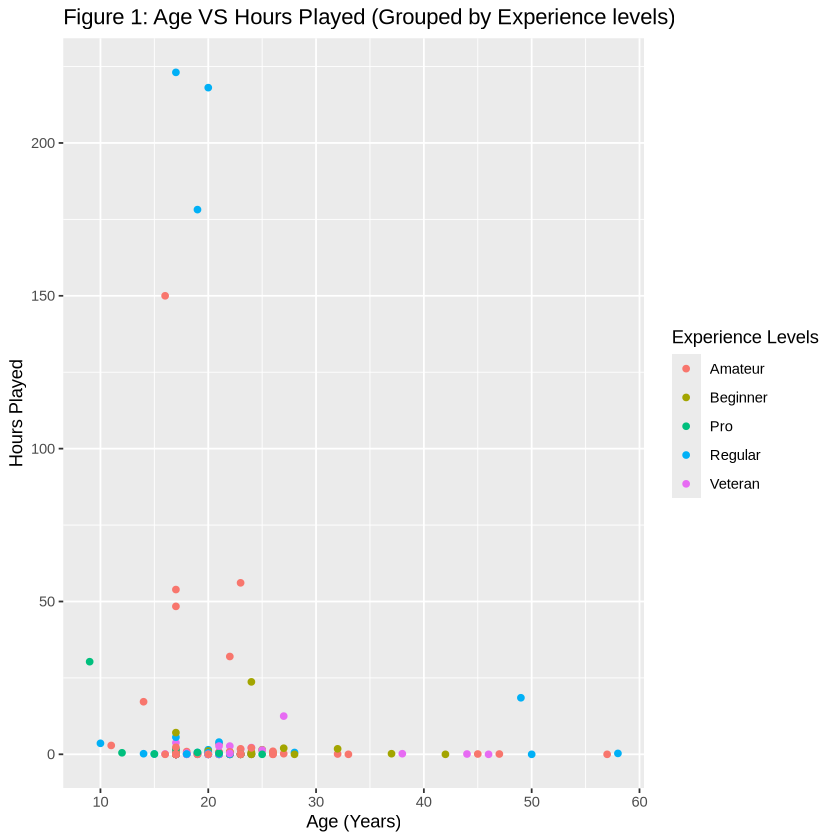

In [6]:
players_age <- players_tidy |>
  ggplot(aes(x=Age, y=played_hours, color=experience)) +
  geom_point() +
  labs(title = "Figure 1: Age VS Hours Played (Grouped by Experience levels)",
        color = "Experience Levels",
        x = "Age (Years)",
        y = "Hours Played" )
players_age

Figure 1 shows that most playtime around 50 hours comes from Amateur experience level players, and over 175 hours from Regular experience levels. Below 10 hours, players are from a mix of levels. Most players are aged 10-30, with outliers over 150 hours in the 16-20 age range. Playtime and player count appear to drop after age 30.

To apply the KNN regression method, we performed the following:

In [7]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [18]:
# Use 75:25 split
set.seed(123)

players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
 set_engine("kknn") |>
 set_mode("regression")

players_recipe <- recipe(played_hours ~ Age, data = players_train) |>
 step_scale(all_predictors()) |>
 step_center(all_predictors())

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)
players_wkflw <- workflow() |>
 add_recipe(players_recipe) |>
 add_model(players_spec)

players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [9]:
# To find the optimal K
set.seed(123)

gridvals <- tibble(neighbors = seq(from = 1, to = 110, by = 2))
players_results <- players_wkflw |>
 tune_grid(resamples = players_vfold, grid = gridvals) |>
 collect_metrics()
head(players_results)

players_min <- players_results |>
 filter(.metric == "rmse") |>
slice_min(order_by = mean, n=1)
players_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,20.050604725,5,8.934869341,Preprocessor1_Model01
1,rsq,standard,0.008208528,5,0.002840169,Preprocessor1_Model01
3,rmse,standard,19.674802105,5,9.110509691,Preprocessor1_Model02
3,rsq,standard,0.005427795,5,0.001735714,Preprocessor1_Model02
5,rmse,standard,22.597078794,5,8.059051673,Preprocessor1_Model03
5,rsq,standard,0.015661430,5,0.006234483,Preprocessor1_Model03


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,19.6748,5,9.11051,Preprocessor1_Model02


The smallest RMSPE appears when K = 3.

In [10]:
#  Evaluating the RMSPE on the test set

k_min <- players_min |> pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
 set_engine("kknn") |>
 set_mode("regression")

players_best_fit <- workflow() |>
 add_recipe(players_recipe) |>
 add_model(players_best_spec) |>
 fit(data = players_train)

players_summary <- players_best_fit |>
 predict(players_test) |>
 bind_cols(players_test) |>
 metrics(truth = played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.368148e+01
rsq,standard,8.589931e-04
mae,standard,8.402041e+00


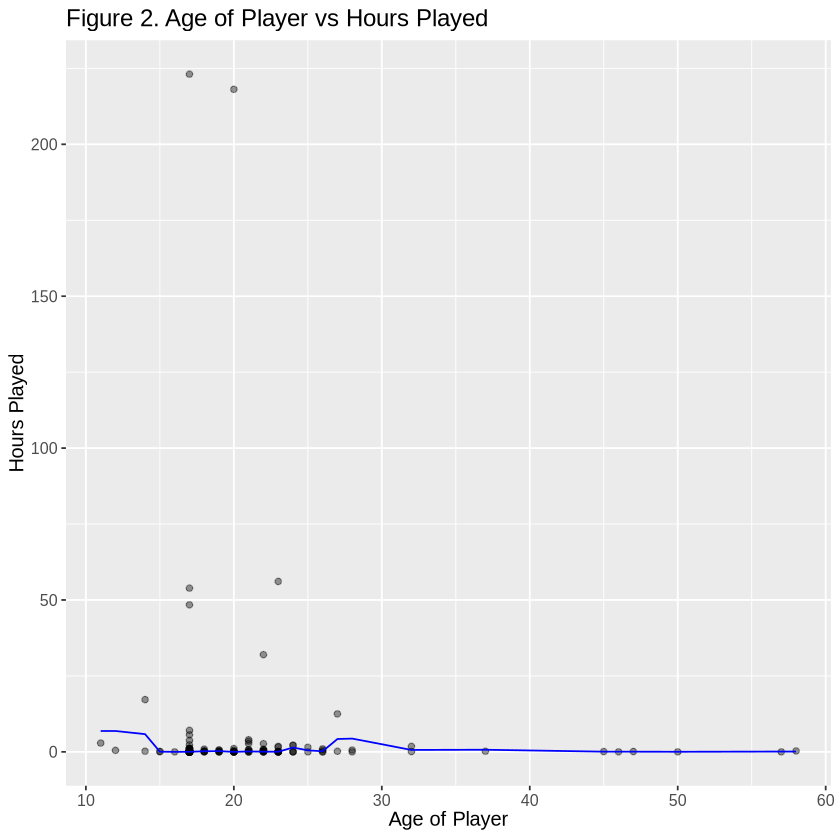

In [11]:
players_pred <- players_best_fit |>
                predict(players_train) |>
                bind_cols(players_train)

players_plot <- ggplot(players_pred, aes(x = Age, y = played_hours)) +
            geom_point(alpha = 0.4) +
            geom_line(aes(y= .pred), color = "blue") + 
            xlab("Age of Player") +
            ylab("Hours Played") + 
            ggtitle("Figure 2. Age of Player vs Hours Played") +
            theme(text = element_text(size = 12))

players_plot

empty cell

## (2.2) Examining if experience level affects total hours played

To investigate if a player's experience level can predict the total hours played by the player, we used the KNN regression method.

We first created a visualization of `experience` and `played_hours`. A boxplot was used to explore the relationship between experience level and hours played, with `experience` on the x-axis and `played_hours` on the y-axis, to identify any patterns and/or trends.

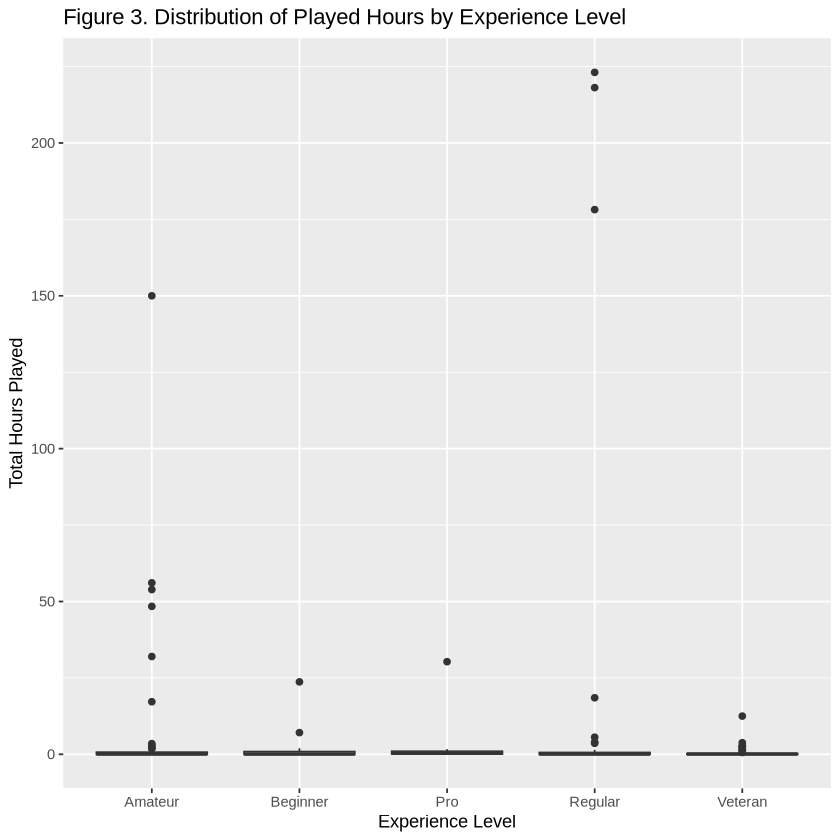

In [12]:
ggplot(players_clean, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(y = "Total Hours Played",
       x = "Experience Level",
       title = "Figure 3. Distribution of Played Hours by Experience Level")

In Figure 3, this boxplot shows that Regular and Amateur players tend to play more hours on average than Veteran, Pro, or Beginner players. This plot also allows us to identify which experience levels contain outliers with unusually high playtime.

Since many extreme outliers were observed, we chose to use KNN regression instead of linear regression. Linear regression fits a single best-fit line, which can be heavily influenced by outliers, potentially skewing predictions. On the other hand, KNN regression predicts based on the nearest neighbours, so it is less sensitive to extreme values and better captures the local patterns in the data.

To apply the KNN regression method, we performed the following:

In [46]:
set.seed(123)

# Split the data 75:25

players_split_2 <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_train_2 <- training(players_split_2)
players_test_2  <- testing(players_split_2)

# Specify the KNN model
players_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# Create the recipe and convert experience to numeric values with dummy variables

players_recipe_xp <- recipe(played_hours ~ experience, data = players_train_2) |>
  step_dummy(experience, one_hot = TRUE) |>  # create all dummy columns
  step_center(all_predictors()) |>           # center numeric predictors (dummy columns)
  step_scale(all_predictors()) 

players_recipe_prep <- prep(players_recipe_xp)
players_train_processed <- bake(players_recipe_prep, new_data = players_train_2)
head(players_train_processed)

# Cross validation
players_vfold_2 <- vfold_cv(players_train_2, v = 5, strata = played_hours)

# Create the workflow
players_wkflw_2 <- workflow() |>
  add_recipe(players_recipe_2) |>
  add_model(players_spec_2)

players_wkflw_2

played_hours,experience_Amateur,experience_Beginner,experience_Pro,experience_Regular,experience_Veteran
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0,-0.7010226,-0.4766923,-0.2712254,2.2376096,-0.5727106
0.0,1.4166498,-0.4766923,-0.2712254,-0.4438234,-0.5727106
0.1,1.4166498,-0.4766923,-0.2712254,-0.4438234,-0.5727106
0.0,-0.7010226,-0.4766923,-0.2712254,-0.4438234,1.7340405
0.0,-0.7010226,-0.4766923,3.6615429,-0.4438234,-0.5727106
0.0,-0.7010226,-0.4766923,-0.2712254,-0.4438234,1.7340405


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_dummy()
• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [23]:
# To find optimal K
set.seed(123) 

kvals <- tibble(neighbors = seq(from = 1, to = 25, by = 2))
players_results_xp <- players_wkflw_2 |>
 tune_grid(resamples = players_vfold_2, grid = kvals) |>
 collect_metrics()
head(players_results_xp)

players_min_xp <- players_results_xp |>
 filter(.metric == "rmse") |>
slice_min(order_by = mean, n=1)
players_min_xp

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x3

There were issues with some computations   A: x3





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,19.59257903,5,9.144958457,Preprocessor1_Model01
1,rsq,standard,0.01395118,2,0.013921353,Preprocessor1_Model01
3,rmse,standard,19.58793273,5,9.146022635,Preprocessor1_Model02
3,rsq,standard,0.01310063,5,0.004006305,Preprocessor1_Model02
5,rmse,standard,19.58426731,5,9.145975642,Preprocessor1_Model03
5,rsq,standard,0.01392030,5,0.004204121,Preprocessor1_Model03


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,rmse,standard,19.11797,5,8.862967,Preprocessor1_Model07


The smallest RMPSE appears when K = 13

In [24]:
#  Evaluating the RMSPE on the test set

k_min_xp <- players_min_xp |> pull(neighbors)

players_best_spec_xp <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_xp) |>
 set_engine("kknn") |>
 set_mode("regression")

players_best_fit_xp <- workflow() |>
 add_recipe(players_recipe_2) |>
 add_model(players_best_spec_xp) |>
 fit(data = players_train_2)

players_summary_xp <- players_best_fit_xp |>
 predict(players_test_2) |>
 bind_cols(players_test_2) |>
 metrics(truth = played_hours, estimate = .pred)
players_summary_xp

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.382438e+01
rsq,standard,1.901359e-05
mae,standard,8.476766e+00


figure out how to make regression graph.... - vanessa 

In [ ]:
# Distribution of hours played
ggplot(players_clean, aes(x=played_hours))+
geom_histogram(binwidth=30)+
labs(x="Hours Played",
     y="Count",
     title="Distribution of Hours Played")

## (3) Discussion

Based on our exploratory analyses, there appears to be some relationship between a player’s experience level and the total hours they spend playing on the PLAIcraft server, but the pattern is not straightforward. Surprisingly, Regular and Amateur players played the most hours on average, while Pro and Veteran players played far fewer hours. This suggests that playing time does not increase with experience. Instead, highly experienced players may log in for more specific tasks or play more efficiently, whereas mid-level players may spend longer periods exploring the game.

The distribution of total hours played was extremely right-skewed, with several very high-hour outliers (e.g., over 200 hours). These outliers likely represent heavy players rather than data errors, but they make it difficult to compare groups using only mean values. Even so, all experience groups showed large variation, meaning experience alone is not a consistent predictor of how much time a player spends in the game.

For age, we did not observe a clear trend—most players were under 25, and differences in played hours across ages were small. Because there were missing age values and the dataset is relatively small, we cannot draw strong conclusions about age’s impact on playtime.

There are several limitations to consider. Experience is self-reported, which may not accurately reflect actual skill. The number of players in some experience groups (such as Pro) is much smaller than others, making comparisons less reliable. Additionally, playtime was measured over an unknown time frame, which may affect interpretation of the results.

Overall, our findings suggest that experience level may relate to gameplay time but not necessarily in the way we originally expected. Future work could explore other factors such as subscription status, gender, or a combination of variables using a predictive model to more accurately understand what drives player engagement.